In [1]:
import pandas as pd
import numpy as np
import time, datetime
from sklearn import datasets, linear_model
pd.options.display.max_columns = None

#import matplotlib
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn
import seaborn as sns

#local plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Zillow Rent-Index Data
- from Kaggle: https://www.kaggle.com/zillow/rent-index

In [2]:
df_price = pd.read_csv("price.csv")

In [3]:
#clean the data
for col in df_price.columns:
    df_price[col] = df_price[col].fillna(0)

In [4]:
#explore NY
df_ny = df_price.copy()
df_ny = df_ny.loc[df_ny['State'] == 'NY']

In [6]:
df_ny['Total Change'] = df_ny.loc[:,'January 2017'] - df_ny.loc[:,'November 2010']
df_ny['Percent Change'] = (df_ny.loc[:,'January 2017'] - df_ny.loc[:,'November 2010']) / df_ny.loc[:,'November 2010']
df_ny['Year Change'] = df_ny.loc[:,'January 2017'] - df_ny.loc[:,'January 2016']
df_ny['Year Percent Change'] = (df_ny.loc[:,'January 2017'] - df_ny.loc[:,'January 2016']) / df_ny.loc[:,'January 2016']

In [17]:
#df_ny = df_ny.set_index('County')
df_ny.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,Total Change,Percent Change,Year Change,Year Percent Change
0,6181,New York,New York,Queens,NY,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1746.000,1752.000,1764.000,1778.000,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,1999,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322,2322.000,inf,-13,-0.006
72,17222,Buffalo,Buffalo,Erie,NY,73,881.000,919.000,950.000,955.000,939.000,920.000,894.000,864.000,827.000,792.000,766.000,748.000,757.000,751.000,751.000,754.000,759.000,763,766,767,772,780,794,806,829,822,802,775,756,749,751,761,767,771,768,765,768,750,738,737,747,758,764,767,772,779,788,791,799,797,798,805,812,819,830,846,861,866,862,857,861,858,860,867,875,873,868,861,857,862,868,876,883,881,878,-3.000,-0.003,18,0.021
109,13550,Rochester,Rochester,Monroe,NY,110,959.000,979.000,985.000,951.000,924.000,906.000,899.000,897.000,895.000,897.000,904.000,904.000,893.000,864.000,845.000,838.000,833.000,831,836,846,859,866,871,873,880,887,894,904,907,901,891,880,874,875,878,887,894,896,894,899,904,908,909,906,899,892,888,886,889,894,901,913,923,933,941,948,957,961,955,944,934,927,926,933,942,950,953,952,945,937,936,943,950,952,951,-8.000,-0.008,25,0.027
148,34937,Yonkers,New York,Westchester,NY,149,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2132.000,2113.000,2107.000,2096.000,2097,2094,2094,2085,2087,2093,2111,2151,2152,2135,2128,2144,2173,2197,2197,2198,2191,2186,2172,2167,2136,2114,2116,2120,2126,2124,2130,2134,2150,2171,2198,2231,2256,2275,2289,2262,2228,2215,2236,2283,2331,2368,2389,2418,2431,2437,2447,2456,2472,2487,2491,2481,2465,2457,2466,2498,2522,2535,2535.000,inf,98,0.040
184,7353,Syracuse,Syracuse,Onondaga,NY,185,1131.000,1131.000,1113.000,1072.000,1020.000,996.000,972.000,955.000,947.000,944.000,935.000,924.000,911.000,912.000,917.000,927.000,944.000,957,965,964,955,943,939,946,954,963,964,965,977,994,1007,1020,1016,998,971,951,942,946,957,961,963,950,934,910,900,910,948,978,997,996,989,973,964,956,968,1002,1042,1074,1082,1076,1058,1048,1058,1076,1100,1111,1113,1104,1093,1080,1076,1078,1075,1064,1054,-77.000,-0.068,-4,-0.004


# NYC

In [18]:
df_nyc = df_ny.copy()
df_nyc = df_nyc.loc[df_nyc['Metro'] == 'New York']
df_nyc.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017,Total Change,Percent Change,Year Change,Year Percent Change
0,6181,New York,New York,Queens,NY,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1746.000,1752.000,1764.000,1778.000,1792,1804,1813,1814,1810,1805,1806,1817,1831,1851,1870,1888,1901,1918,1941,1968,1987,1999,2004,2014,2026,2040,2052,2058,2064,2071,2080,2104,2132,2169,2191,2206,2214,2216,2229,2241,2248,2253,2251,2246,2259,2276,2304,2322,2334,2335,2331,2329,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322,2322.000,inf,-13,-0.006
148,34937,Yonkers,New York,Westchester,NY,149,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2132.000,2113.000,2107.000,2096.000,2097,2094,2094,2085,2087,2093,2111,2151,2152,2135,2128,2144,2173,2197,2197,2198,2191,2186,2172,2167,2136,2114,2116,2120,2126,2124,2130,2134,2150,2171,2198,2231,2256,2275,2289,2262,2228,2215,2236,2283,2331,2368,2389,2418,2431,2437,2447,2456,2472,2487,2491,2481,2465,2457,2466,2498,2522,2535,2535.000,inf,98,0.040
435,398360,Town of Poughkeepsie,New York,Dutchess,NY,436,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1560.000,1569.000,1578.000,1591.000,1600,1601,1595,1583,1575,1564,1556,1540,1536,1530,1521,1512,1507,1503,1504,1507,1515,1527,1538,1542,1553,1557,1546,1528,1515,1506,1500,1499,1507,1524,1546,1563,1580,1594,1597,1598,1602,1615,1638,1658,1659,1650,1633,1618,1611,1624,1643,1679,1708,1731,1739,1736,1730,1726,1727,1730,1737,1735,1735.000,inf,111,0.068
554,26114,New Rochelle,New York,Westchester,NY,555,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2779.000,2787.000,2796.000,2810.000,2831,2861,2914,2971,3017,3016,3010,3010,3005,3010,3041,3071,3084,3077,3069,3053,3038,3039,3033,3026,2970,2917,2873,2843,2822,2808,2792,2815,2877,2968,3038,3102,3122,3116,3094,3061,3072,3127,3218,3289,3329,3345,3355,3387,3426,3465,3519,3546,3535,3493,3436,3380,3325,3276,3246,3229,3220,3225,3225.000,inf,-240,-0.069
657,32991,Mount Vernon,New York,Westchester,NY,658,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2058.000,2068.000,2088.000,2108.000,2125,2117,2101,2069,2057,2047,2071,2104,2141,2158,2162,2174,2191,2216,2237,2246,2236,2219,2196,2165,2137,2123,2129,2128,2116,2097,2081,2088,2105,2132,2139,2147,2160,2178,2190,2186,2183,2200,2240,2299,2341,2367,2376,2391,2410,2423,2428,2431,2439,2445,2441,2422,2409,2410,2426,2433,2428,2422,2422.000,inf,-1,-0.000


In [19]:
df_nyc = pd.pivot_table(df_nyc,index=["County"],values=["Year Change"],aggfunc=[np.mean]).reset_index()
df_nyc.columns = df_nyc.columns.droplevel(1)

In [20]:
#plotly
# Create a trace
trace1 = go.Bar(
    x = df_nyc['County'],
    y = df_nyc['mean'],
    name = 'Average'
)

data = [trace1]

layout = go.Layout(
    barmode='group',
    title = "Average Year Change in Rent by NY Metro County"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

# NY Counties

In [47]:
df_county = pd.pivot_table(df_ny,index=["County"],values=["Total Change"],aggfunc=[np.mean]).reset_index()
df_county.columns = df_county.columns.droplevel(1)

,County,mean
0,Albany,47.571
1,Broome,-92.875
2,Cattaraugus,-62.471
3,Cayuga,65.471
4,Chautauqua,-265.600


In [49]:
#plotly
# Create a trace
trace1 = go.Bar(
    x = df_county['County'],
    y = df_county['mean'],
    name = 'Average'
)

data = [trace1]

layout = go.Layout(
    barmode='group',
    title = "Average Change in Rent by NY County"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')



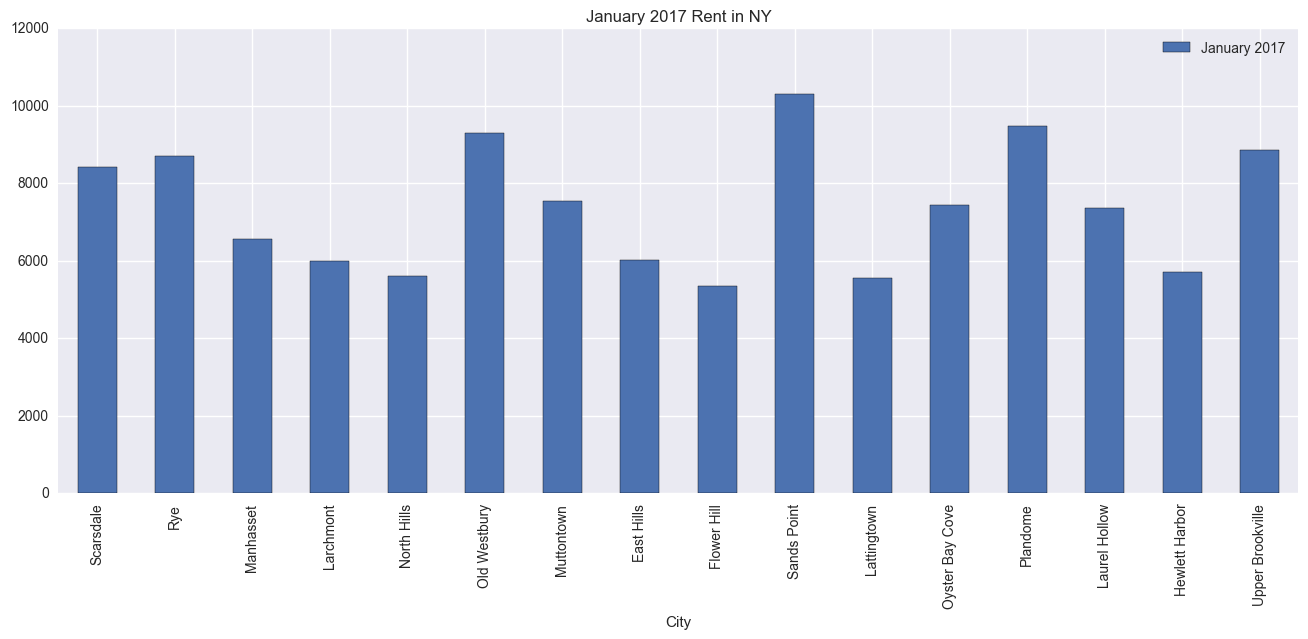

In [19]:
df_ny = df_ny.loc[df_ny['January 2017'] > 5000]
ax = df_ny[['January 2017']].plot(title="January 2017 Rent in NY",legend=True, kind='bar',figsize=[16,6], x = df_ny['City'])

#ax.legend(['mean','max','min'])

In [6]:
df_sqft = pd.read_csv("pricepersqft.csv")

In [7]:
df_sqft.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,November 2011,December 2011,January 2012,February 2012,March 2012,April 2012,May 2012,June 2012,July 2012,August 2012,September 2012,October 2012,November 2012,December 2012,January 2013,February 2013,March 2013,April 2013,May 2013,June 2013,July 2013,August 2013,September 2013,October 2013,November 2013,December 2013,January 2014,February 2014,March 2014,April 2014,May 2014,June 2014,July 2014,August 2014,September 2014,October 2014,November 2014,December 2014,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,October 2015,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.390,1.388,1.392,1.396,1.402,1.412,1.420,1.424,1.422,1.420,1.426,1.442,1.458,1.468,1.478,1.486,1.496,1.502,1.510,1.518,1.526,1.538,1.544,1.552,1.558,1.568,1.582,1.592,1.600,1.604,1.612,1.630,1.650,1.672,1.682,1.690,1.690,1.692,1.700,1.708,1.718,1.726,1.736,1.740,1.752,1.764,1.780,1.788,1.792,1.794,1.800,1.804,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,1.586,1.588,1.590,1.594,1.594,1.594,1.592,1.590,1.592,1.592,1.590,1.588,1.588,1.588,1.590,1.588,1.590,1.588,1.592,1.594,1.598,1.602,1.608,1.616,1.622,1.628,1.634,1.640,1.648,1.656,1.662,1.672,1.676,1.682,1.680,1.680,1.678,1.682,1.688,1.696,1.708,1.720,1.738,1.760,1.780,1.800,1.816,1.834,1.850,1.862,1.870,1.878,1.888,1.900,1.908,1.914,1.920,1.930,1.948,1.962,1.978,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,1.248,1.240,1.232,1.224,1.220,1.212,1.206,1.194,1.188,1.180,1.176,1.174,1.174,1.176,1.178,1.182,1.188,1.184,1.182,1.186,1.198,1.202,1.198,1.200,1.204,1.214,1.222,1.232,1.232,1.236,1.238,1.252,1.264,1.272,1.280,1.286,1.286,1.280,1.276,1.272,1.274,1.282,1.292,1.296,1.304,1.302,1.302,1.298,1.304,1.306,1.308,1.310,1.316,1.322,1.326,1.328,1.330,1.332,1.338,1.340,1.346,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,0.792,0.796,0.796,0.794,0.788,0.784,0.778,0.772,0.772,0.776,0.776,0.780,0.782,0.786,0.786,0.788,0.788,0.794,0.798,0.798,0.798,0.796,0.800,0.806,0.812,0.818,0.824,0.830,0.836,0.840,0.848,0.856,0.866,0.872,0.874,0.872,0.868,0.868,0.874,0.882,0.892,0.902,0.914,0.924,0.934,0.944,0.950,0.956,0.958,0.962,0.964,0.968,0.972,0.974,0.974,0.974,0.972,0.974,0.976,0.980,0.982,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,0.856,0.854,0.854,0.852,0.850,0.848,0.850,0.850,0.852,0.852,0.854,0.858,0.860,0.862,0.860,0.860,0.860,0.858,0.858,0.858,0.856,0.854,0.854,0.852,0.852,0.852,0.852,0.852,0.852,0.852,0.852,0.854,0.856,0.860,0.864,0.866,0.870,0.872,0.872,0.872,0.876,0.882,0.892,0.898,0.904,0.908,0.910,0.910,0.910,0.910,0.916,0.924,0.930,0.932,0.932,0.930,0.930,0.930,0.934,0.938,0.944,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
